In [21]:
import audio
import visualise
import soundfile as sf
import os
import matplotlib.pyplot as plt


In [9]:
# Catalog samples
sample_dir = 'samples'

samples = []
for filename in [f for f in os.listdir('samples') if f.endswith('.aif') or f.endswith('.wav')]:
    sample = audio.load_sample(os.path.join(sample_dir, filename))
    samples.append(sample)
samples = sorted(samples, key=lambda s: s.name)
audio.info_grid(samples)

,name,sr,samples,duration,peak,rms,loudness
0,samples/Cordoba mic 0001 [2024-01-01 141946].aif,48000,4512000,94.00000,0.693207,0.061111,-23.789907
1,samples/Cordoba pickup 0001 [2024-01-01 141947...,48000,4512000,94.00000,0.504333,0.036160,-28.057851
2,samples/Eastman mic 0005 [2023-12-30 160551].aif,48000,768000,16.00000,0.309469,0.043981,-28.174244
3,samples/Eastman mic 0006 [2023-12-30 161352].aif,48000,768000,16.00000,0.083417,0.015638,-37.244074
4,samples/Eastman mic 0008 [2023-12-30 161423].aif,48000,768000,16.00000,0.281032,0.036721,-29.783635
5,samples/Eastman mic 0009 [2023-12-30 162118].aif,48000,768000,16.00000,0.343065,0.042430,-28.412893
6,samples/Eastman mic 0010 [2024-01-01 132750].aif,48000,4128000,86.00000,1.000000,0.085559,-20.167044
7,samples/Eastman piezo 0005 [2023-12-30 160551]...,48000,768000,16.00000,0.332617,0.049556,-26.683516
8,samples/Eastman piezo 0006 [2023-12-30 161352]...,48000,768000,16.00000,0.177042,0.019940,-34.791605
9,samples/Eastman piezo 0008 [2023-12-30 161423]...,48000,768000,16.00000,0.328589,0.034855,-30.076556


In [12]:
# Constants
IR_LEN = 2048

In [46]:
# Norman 12 string
# SOURCE = audio.load_sample('samples/Norman piezo 0003 [2024-01-01 134007].aif')
# TARGET = audio.load_sample('samples/Norman Mic 0003 [2024-01-01 134007].aif')
# 
# audio.info_grid([SOURCE, TARGET])

,name,sr,samples,duration,peak,rms,loudness
0,samples/Norman piezo 0003 [2024-01-01 134007].aif,48000,3936000,82.0,0.417154,0.032251,-28.608283
1,samples/Norman Mic 0003 [2024-01-01 134007].aif,48000,3936000,82.0,1.000000,0.111086,-18.408194


In [51]:
# Eastman
SOURCE = audio.load_sample('samples/Eastman piezo 0010 [2024-01-01 132751].aif')
TARGET = audio.load_sample('samples/Eastman mic 0010 [2024-01-01 132750].aif')

audio.info_grid([SOURCE, TARGET])

,name,sr,samples,duration,peak,rms,loudness
0,samples/Eastman piezo 0010 [2024-01-01 132751]...,48000,4128000,86.0,0.742755,0.067436,-22.413924
1,samples/Eastman mic 0010 [2024-01-01 132750].aif,48000,4128000,86.0,1.000000,0.085559,-20.167044


In [59]:
# Basic
ir = audio.create_ir(SOURCE, TARGET)

# from normalised slices, averaged, discarding low amplitude slices
ir2 = audio.create_average_ir(audio.prepare_slices(SOURCE, TARGET, 1.0, 0, -24, 0.05, False, None))

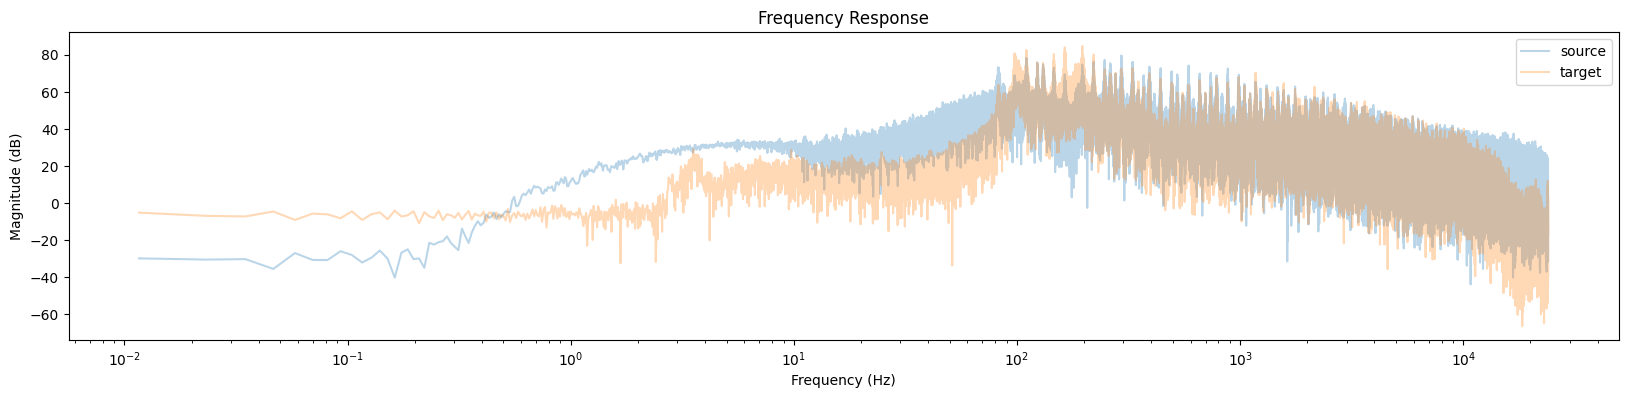

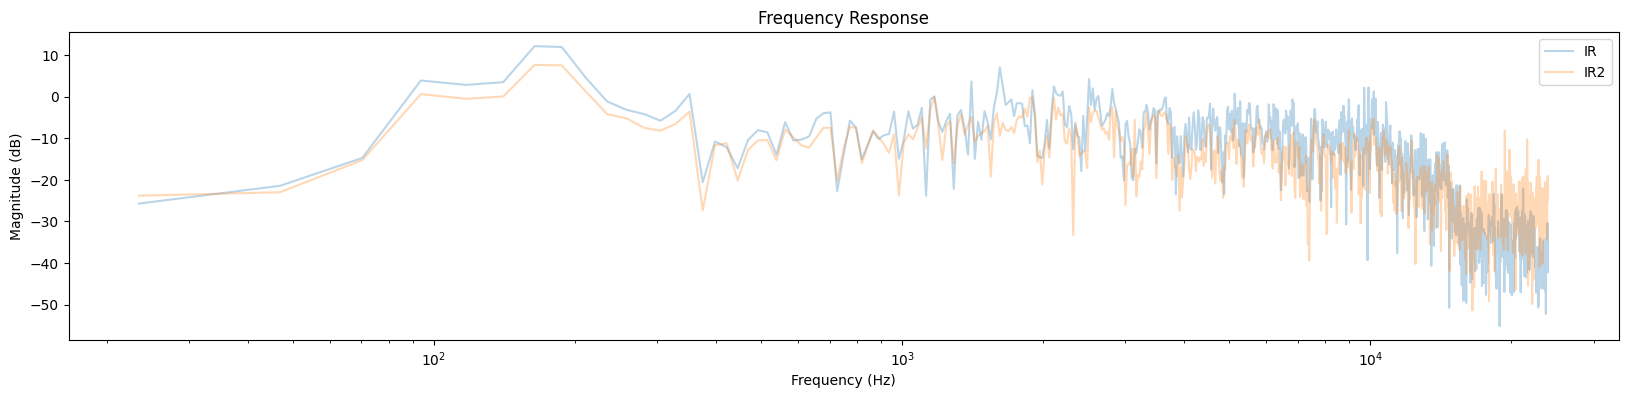

In [60]:
plt.figure(figsize=(20, 4))
visualise.plot_sample_frequency_response(SOURCE, logscale=True, label='source')
visualise.plot_sample_frequency_response(TARGET, logscale=True, label='target')
plt.legend()
plt.figure(figsize=(20, 4))
visualise.plot_frequency_response(ir, SOURCE.sr, logscale=True, label= 'IR')
visualise.plot_frequency_response(ir2, SOURCE.sr, logscale=True, label= 'IR2')
plt.legend();

In [61]:
# Uncomment to SAVE
IR_NAME = 'IRs/IR-Eastman-3.wav'
sf.write(IR_NAME, ir2, samplerate=TARGET.sr)
'Saved: ' + IR_NAME

'Saved: IRs/IR-Eastman-3.wav'

In [62]:
os.listdir('IRs')

['Eastman-piezo-to-SM58-1.wav',
 'IR-Eastman-3.wav',
 'Norman-12String.wav',
 'IR-Eastman-piezo-to-SM58.wav',
 'IR-Norman-12String.wav',
 'SM58.wav',
 'IR-Norman-12String-2.wav']